In [53]:
# Data Processing
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
sales_data_2017 = pd.read_csv('Forbes-2017.csv',encoding='latin1', low_memory=False, on_bad_lines='skip')
sales_data_2018 = pd.read_csv('Forbes-2018.csv',encoding='latin1', low_memory=False, on_bad_lines='skip')
sales_data_2019 = pd.read_csv('Forbes-2019.csv',encoding='latin1', low_memory=False, on_bad_lines='skip')
sales_data_2020 = pd.read_csv('Forbes-2020.csv',encoding='latin1', low_memory=False, on_bad_lines='skip')
sales_data_2021 = pd.read_csv('Forbes-2021.csv',encoding='latin1', low_memory=False, on_bad_lines='skip')

In [29]:
sales_data = pd.concat([sales_data_2017, sales_data_2018, sales_data_2019, sales_data_2020, sales_data_2021], ignore_index=True)

In [49]:
sales_data.head()

,Rank,Name,Country,Sales,Profit,Assets,Market Value,Year,Sales Conversion,Profit Conversion,Assets Conversion,Market Value Conversion
0,1.0,ICBC,China,151.381,41.9837,3473.238,229.805,2017,0.0,0.0,0.0,0.0
1,2.0,China Construction Bank,China,134.242,34.9814,3016.578,200.458,2017,0.0,0.0,0.0,0.0
2,3.0,Berkshire Hathaway,United States,222.935,24.074,620.854,409.908,2017,0.0,0.0,0.0,0.0
3,4.0,JPMorgan Chase,United States,102.494,24.231,2512.986,306.616,2017,0.0,0.0,0.0,0.0
4,5.0,Wells Fargo,United States,97.573,21.938,1943.443,274.385,2017,0.0,0.0,0.0,0.0


In [30]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10100 entries, 0 to 10099
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          9981 non-null   float64
 1   Name          10100 non-null  object 
 2   Country       10098 non-null  object 
 3   Sales         10093 non-null  object 
 4   Profit        10097 non-null  object 
 5   Assets        10086 non-null  object 
 6   Market Value  10092 non-null  object 
 7   Year          10100 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 631.4+ KB


In [32]:
sales_data.shape

(10100, 8)

In [ ]:
sales_data.isna().sum()

,0
Rank,119
Name,0
Country,0
Sales,0
Profit,0
Assets,2
Market Value,0
Year,0


In [ ]:
# Using value counts on the name column
sales_data['Name'].value_counts(ascending=False)

,count
Name,
Paycom,2
Hyakujushi Bank,2
Bank Of Gansu,2
Zhejiang Chint Electrics,2
FIBI Holdings,2
...,...
Woori Financial Group,1
TCL,1
Associated British Foods,1


In [33]:
# Checking for Duplicate
print("Are there duplicate instances:",sales_data['Name'].duplicated().any())

# Dropping Duplicate
sales_data = sales_data.drop_duplicates(subset=['Name','Country','Sales','Profit','Assets','Market Value'])

# Checking for Duplicate again
print("Are there duplicate instances:",sales_data['Name'].duplicated().any())

Are there duplicate instances: True
Are there duplicate instances: True


In [34]:
# Missing Ranking?
sales_data[sales_data['Rank'].isna()].head()

,Rank,Name,Country,Sales,Profit,Assets,Market Value,Year
8015,NaN,Citigroup,United States,$84.4 B,$17.1 B,"$2,314.3 B",$151.2 B,2021
8031,NaN,China Mobile,Hong Kong,$111.3 B,$15.6 B,$264.2 B,$134.9 B,2021
8047,NaN,Sinopec,China,$271.1 B,$4.8 B,$265.1 B,$82.6 B,2021
8063,NaN,LVMH Moët Hennessy Louis Vuitton,France,$50.9 B,$5.4 B,$133 B,$380.3 B,2021
8079,NaN,UBS,Switzerland,$32.2 B,$6.5 B,"$1,125.8 B",$57.3 B,2021


In [35]:
#  B (Billion) and M (Million) unit conversion

def conversion(value):
    '''
    For converting wealth indicator from String to Float
    like $45.8 B to 45800000000000.0
    '''
    try:
        if value[-1].upper() == 'B':
            worth = float(value.replace('$',"").replace(" B","").replace(",","")) * (10**9)
        elif value[-1].upper() == 'M':
            worth = float(value.replace('$',"").replace(" M","").replace(",","")) * (10**6)
    except:
        # For NaN value, these company most likely won't be in the analysis anyways
        worth = 0

    return worth

In [36]:
# Example of how this conversion funtion works
value = sales_data['Profit'][0] # '$45.8 B'
print('Orginial:',value)
print('Conversion:',conversion(value))

Orginial: 41.9837
Conversion: 0


In [37]:
# Create new column using conversion function to assign new value
for col in sales_data.loc[:,"Sales":"Market Value"].columns.to_list():
    sales_data[col+' Conversion'] = sales_data[col].apply(lambda val: conversion(val))

sales_data.head()

,Rank,Name,Country,Sales,Profit,Assets,Market Value,Year,Sales Conversion,Profit Conversion,Assets Conversion,Market Value Conversion
0,1.0,ICBC,China,151.381,41.9837,3473.238,229.805,2017,0.0,0.0,0.0,0.0
1,2.0,China Construction Bank,China,134.242,34.9814,3016.578,200.458,2017,0.0,0.0,0.0,0.0
2,3.0,Berkshire Hathaway,United States,222.935,24.074,620.854,409.908,2017,0.0,0.0,0.0,0.0
3,4.0,JPMorgan Chase,United States,102.494,24.231,2512.986,306.616,2017,0.0,0.0,0.0,0.0
4,5.0,Wells Fargo,United States,97.573,21.938,1943.443,274.385,2017,0.0,0.0,0.0,0.0


In [ ]:
sales_data['Country'].value_counts().head(10)

,count
Country,
United States,590
China,291
Japan,215
United Kingdom,66
South Korea,62
Hong Kong,59
Canada,56
Germany,54
France,53


<ipython-input-38-debf15cc1a14>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




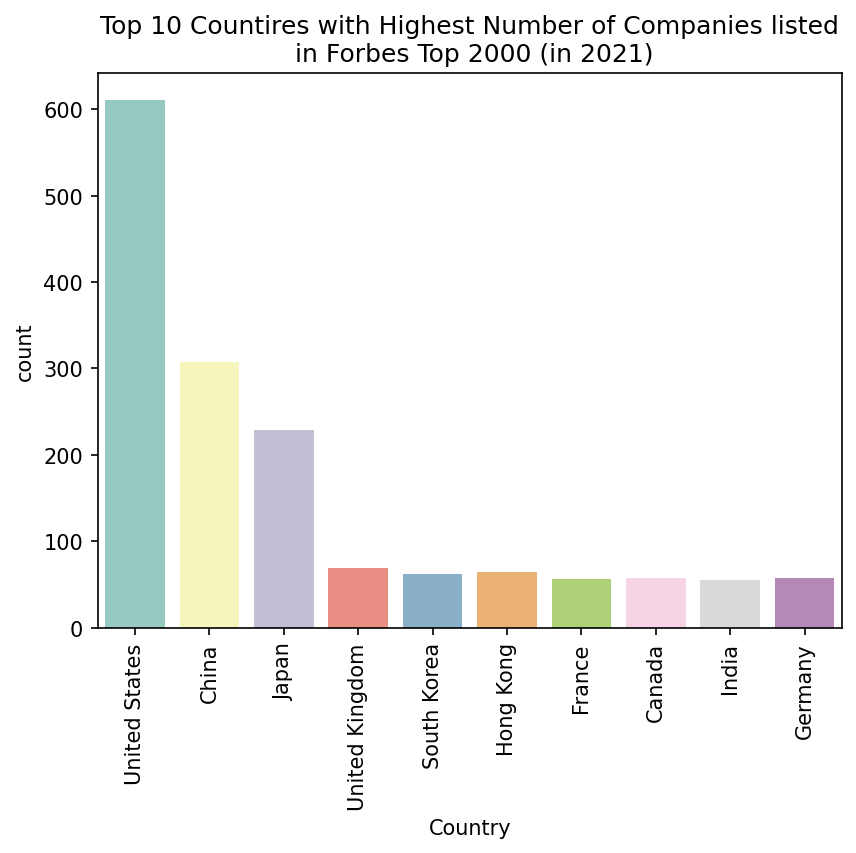

In [38]:
plt.figure(dpi=150)
sns.countplot(data = sales_data_2021,
              x = 'Country',
              order = sales_data['Country'].value_counts().iloc[:10].index.to_list(),
              palette = 'Set3')
plt.title("Top 10 Countires with Highest Number of Companies listed\n in Forbes Top 2000 (in 2021)")
plt.xticks(rotation=90)
plt.show()

        Rank                     Name         Country    Sales    Profit  \
752    711.0               Assa Abloy          Sweden   $9.5 B  $996.2 M   
546    516.0     Willis Towers Watson  United Kingdom   $9.4 B    $996 M   
1867  1760.0             Kimco Realty   United States   $1.7 B  $995.7 M   
1008   952.0       Sinotruk Hong Kong           China  $14.3 B  $995.2 M   
431    408.0   Phoenix Group Holdings  United Kingdom  $27.9 B  $993.8 M   
1777  1677.0                     KT&G     South Korea   $4.5 B  $993.1 M   
1145  1081.0                   Garmin     Switzerland   $4.2 B  $992.3 M   
999    944.0  United Microelectronics          Taiwan     $6 B  $991.3 M   
889    840.0       Seagate Technology         Ireland  $10.2 B    $989 M   
955    902.0                      SMC           Japan   $4.9 B  $986.5 M   

        Assets Market Value  Year  
752    $14.3 B      $33.6 B  2021  
546    $38.5 B        $31 B  2021  
1867   $11.6 B       $8.5 B  2021  
1008     $17 B     

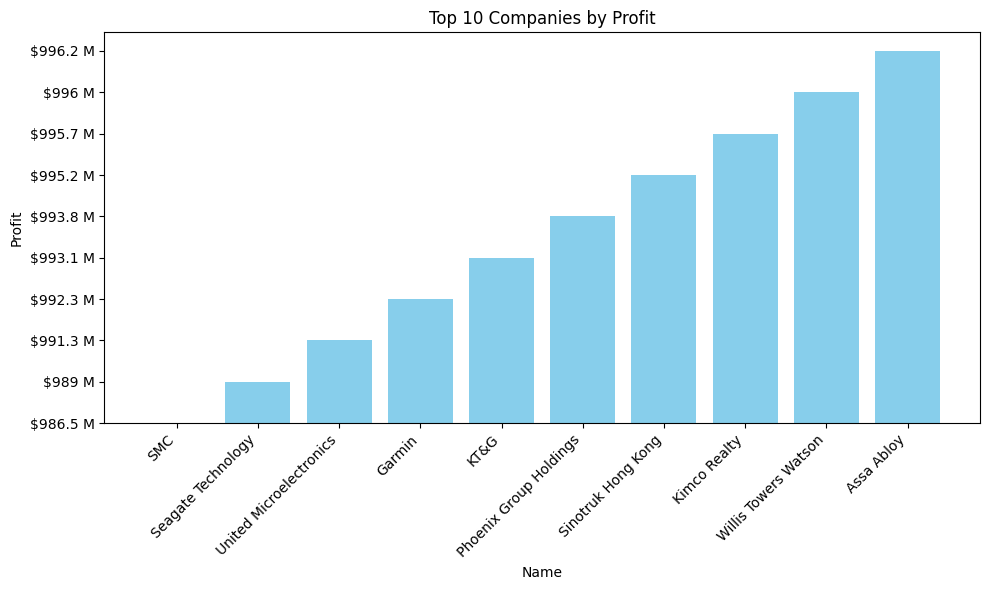

In [40]:
# Top 10 profit making companies in year 2021
top_companies = sales_data_2021.sort_values(by='Profit', ascending=False)

# Get the top 10 companies
top_10_companies = top_companies.head(10)

# Display the result
print(top_10_companies)

# Plot the top 10 companies by profit in reverse order
plt.figure(figsize=(10, 6))
plt.bar(top_10_companies['Name'][::-1], top_10_companies['Profit'][::-1], color='skyblue')
plt.xlabel('Name')
plt.ylabel('Profit')
plt.title('Top 10 Companies by Profit')
# Top 10 profit making companies in year 2021
top_companies = sales_data_2021.sort_values(by='Profit', ascending=False)

# Get the top 10 companies
top_10_companies = top_companies.head(10)

# Display the result
print(top_10_companies)

# Plot the top 10 companies by profit in reverse order


plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-46-3ac9a27efc03>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-46-3ac9a27efc03>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Top 5 profit-making companies:
Name
Apple                 2640.242
Alphabet              2209.027
Microsoft             2204.714
Facebook              1460.775
Berkshire Hathaway    1418.203
Name: Market Value, dtype: float64


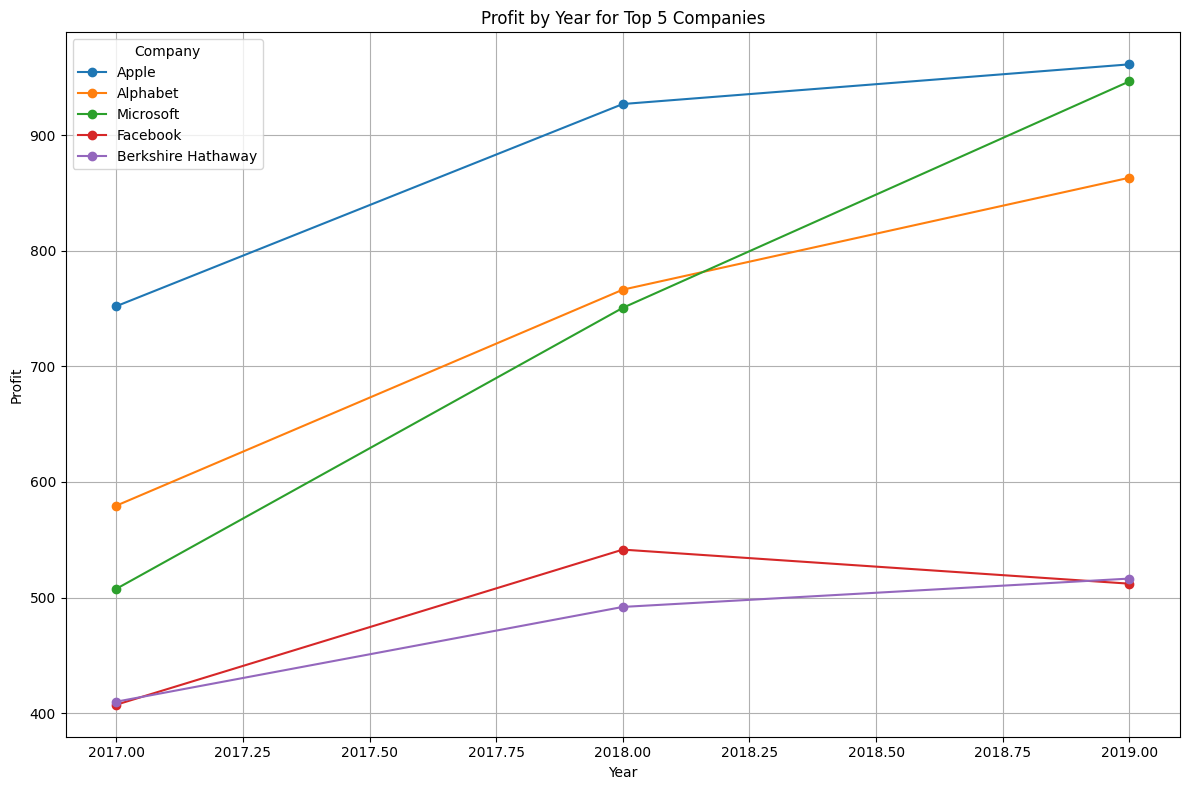

In [46]:
# Ensure 'Profit' column is numeric
sales_data['Market Value'] = pd.to_numeric(sales_data['Market Value'], errors='coerce')

# Ensure 'year' column is numeric (if not already)
sales_data['Year'] = pd.to_numeric(sales_data['Year'], errors='coerce')

# Drop rows with invalid 'Profit' or 'year' values
sales_data = sales_data.dropna(subset=['Market Value', 'Year'])

# Group by 'Company' and sum profits to find total profits for all years
total_profits = sales_data.groupby('Name')['Market Value'].sum()

# Sort companies by total profit in descending order
top_5_companies = total_profits.sort_values(ascending=False).head(5)

# Display the top 5 profit-making companies
print("Top 5 profit-making companies:")
print(top_5_companies)

# Filter sales_data for only the top 5 companies
top_5_data = sales_data[sales_data['Name'].isin(top_5_companies.index)]

# Plot the profit for each year for the top 5 companies
plt.figure(figsize=(12, 8))
for company in top_5_companies.index:
    company_data = top_5_data[top_5_data['Name'] == company]
    plt.plot(company_data['Year'], company_data['Market Value'], marker='o', label=company)

plt.xlabel('Year')
plt.ylabel('Profit')
plt.title('Profit by Year for Top 5 Companies')
plt.legend(title="Company")
plt.grid(True)
plt.tight_layout()
plt.show()


Linear Regression




In [57]:
# Assign a unique ID to each company
sales_data["Company_ID"] = sales_data["Name"].factorize()[0] + 1

# Get the latest market value for each company
latest_Profit = sales_data.sort_values("Year").groupby("Company_ID").last().reset_index()
latest_Profit = latest_Profit[["Company_ID", "Profit"]]

# Pivot the DataFrame to create columns for sales in each year
sales_pivot = sales_data.pivot_table(
    index=["Company_ID", "Name"],
    columns="Year",
    values="Sales"
).reset_index()

# Merge the latest market value into the pivoted DataFrame
result = pd.merge(sales_pivot, latest_Profit, on="Company_ID")

# Rename columns for clarity
result.columns.name = None
result = result.rename(columns={year: f"Sales_{year}" for year in result.columns[2:-1]})

# Display the resulting DataFrame
print(result)

      Company_ID                              Name Sales_2017 Sales_2018  \
0              1                              ICBC    151.381    165.338   
1              2           China Construction Bank    134.242    143.202   
2              3                Berkshire Hathaway    222.935    235.165   
3              4                    JPMorgan Chase    102.494     118.18   
4              5                       Wells Fargo     97.573    102.063   
...          ...                               ...        ...        ...   
2405        2408  Mitsubishi Gas Chemical Company,        NaN        NaN   
2406        2409                          Bank OZK        NaN        NaN   
2407        2410                       Grupa LOTOS        NaN        NaN   
2408        2411                     Taiwan Cement        NaN        NaN   
2409        2412                              IDEX        NaN        NaN   

     Sales_2019  Profit  
0       175.874  45.223  
1       150.313  38.841  
2       2

In [58]:
# Handle null values: Drop rows with missing values
result = result.dropna()

# Prepare features (X) and target (y)
X = result.filter(like="Sales_")  # Select all sales columns
y = result["Profit"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Display coefficients
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
print(coefficients)

Mean Squared Error: 7.883978593657149
R-squared: 0.13938454504761322
      Feature  Coefficient
0  Sales_2017    -0.050237
1  Sales_2018     0.077548
2  Sales_2019     0.043786


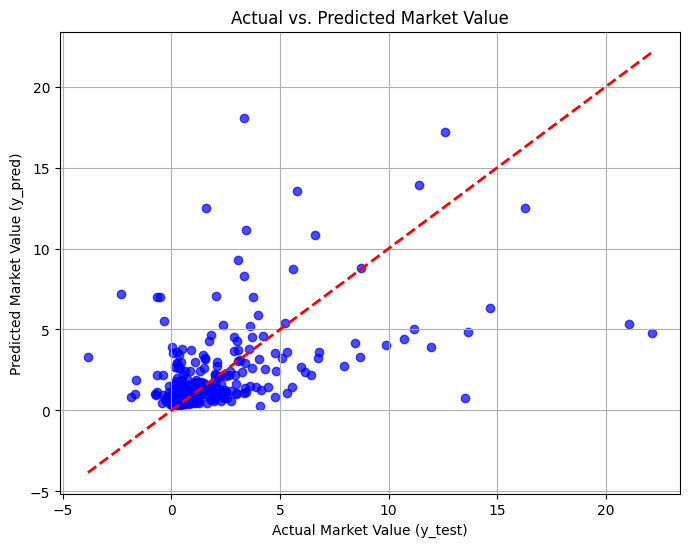

In [59]:
# Plot y_test vs. y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title("Actual vs. Predicted Market Value")
plt.xlabel("Actual Market Value (y_test)")
plt.ylabel("Predicted Market Value (y_pred)")
plt.grid(True)
plt.show()